<a href="https://colab.research.google.com/github/ammarshibani/data-analysis-colab/blob/main/IMDB_Sentiment_Analysis_with_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Step 1: Import libraries**

In [ ]:
!pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 11.5 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, Dropout, Flatten, Conv1D, MaxPooling1D, LSTM
from tensorflow.keras.optimizers import Adam
import skfuzzy as fuzz

# **Step 2: Load dataset**

                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


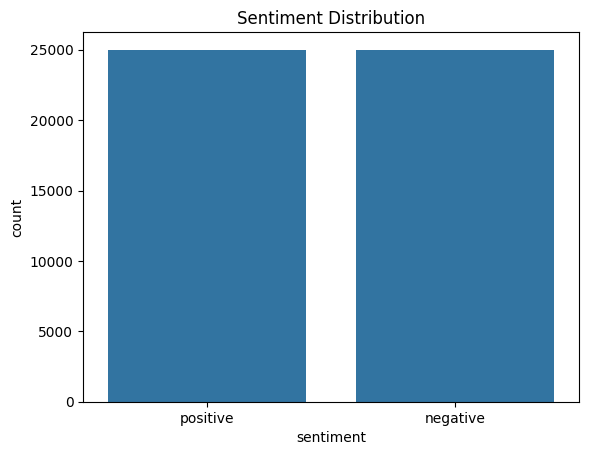

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('IMDB_Dataset.csv')
print(df.head())

# Visualize sentiment distribution
sns.countplot(x='sentiment', data=df)
plt.title("Sentiment Distribution")
plt.show()

# **Step 3: Preprocess data**

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


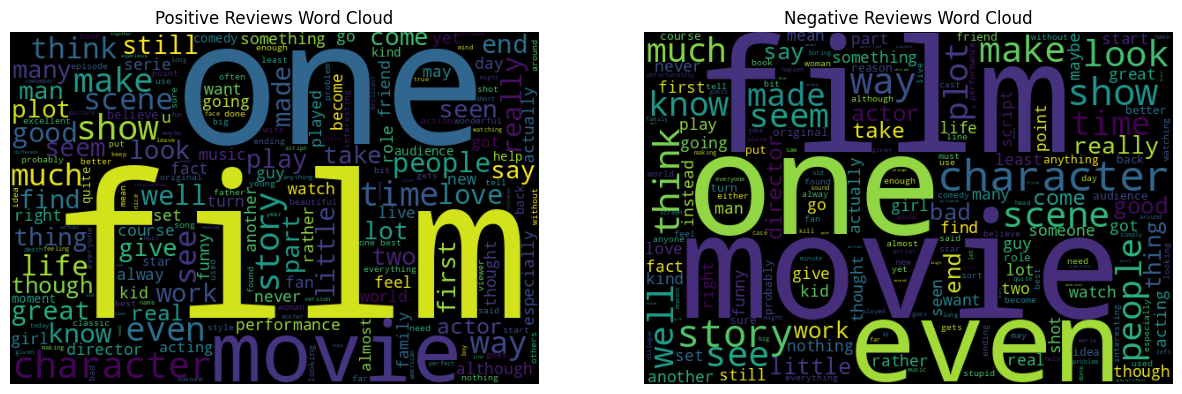

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    text = text.lower().split()
    return ' '.join([word for word in text if word not in stop_words])

df['review'] = df['review'].apply(clean_text)
df['sentiment'] = df['sentiment'].map({'positive': 1, 'negative': 0})

df['cleaned_review'] = df['review'].apply(clean_text)
# Generate word clouds
plt.figure(figsize=(15, 7))

plt.subplot(1, 2, 1)
# Filter using numerical sentiment values (1 for positive)
positive_text = ' '.join(df[df['sentiment'] == 1]['cleaned_review'])
wordcloud = WordCloud(width=600, height=400).generate(positive_text)
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Positive Reviews Word Cloud')

plt.subplot(1, 2, 2)
# Filter using numerical sentiment values (0 for negative)
negative_text = ' '.join(df[df['sentiment'] == 0]['cleaned_review'])
wordcloud = WordCloud(width=600, height=400).generate(negative_text)
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Negative Reviews Word Cloud')
plt.show()

# **Step 4: Tokenization and Split data**

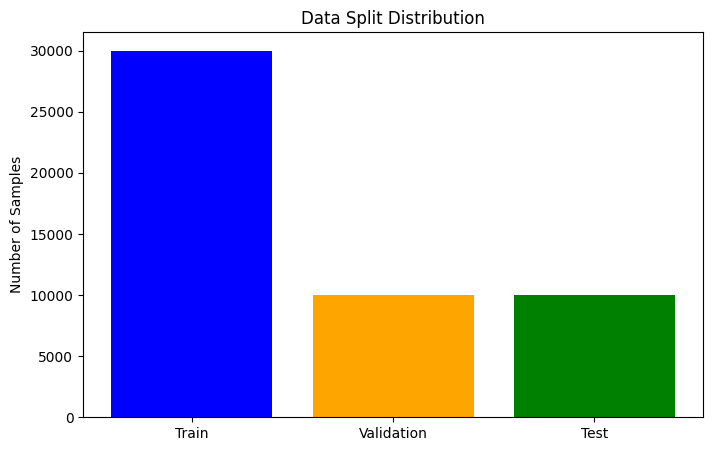

In [ ]:
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(df['review'])
X = tokenizer.texts_to_sequences(df['review'])
X = pad_sequences(X, maxlen=200)
y = df['sentiment'].values

# Split data (60% train, 20% validation, 20% test)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42)

# Visualize data splits
split_counts = {
    'Train': len(X_train),
    'Validation': len(X_val),
    'Test': len(X_test)
}

plt.figure(figsize=(8, 5))
plt.bar(split_counts.keys(), split_counts.values(), color=['blue', 'orange', 'green'])
plt.title('Data Split Distribution')
plt.ylabel('Number of Samples')
plt.savefig('data_split.png')
plt.show()

# **Step 5: Define a function to train and evaluate models**

In [ ]:
def train_model(model, name, X_train, y_train, X_test, y_test):
    model.compile(loss='binary_crossentropy', optimizer=Adam(1e-3), metrics=['accuracy'])
    print(f"\nTraining {name} Model...\n" + "-"*40)
    history = model.fit(
        X_train, y_train,
        epochs=5,
        batch_size=128,
        validation_split=0.2,
        verbose=2
    )
    # Evaluate on test set
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
    print(f"\n{name} Test Accuracy: {accuracy:.4f}")

    # Plot accuracy and loss
    plt.figure(figsize=(12, 5))
    # Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.title(f"{name} Accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.grid(True)
    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title(f"{name} Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    return model, history

# **Step 7: Model Building**


### **CNN Model**

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(



Training CNN Model...
----------------------------------------
Epoch 1/5
188/188 - 80s - 424ms/step - accuracy: 0.7420 - loss: 0.4744 - val_accuracy: 0.8817 - val_loss: 0.2972
Epoch 2/5
188/188 - 75s - 397ms/step - accuracy: 0.9187 - loss: 0.2268 - val_accuracy: 0.8845 - val_loss: 0.2864
Epoch 3/5
188/188 - 80s - 424ms/step - accuracy: 0.9534 - loss: 0.1389 - val_accuracy: 0.8660 - val_loss: 0.3803
Epoch 4/5
188/188 - 83s - 443ms/step - accuracy: 0.9744 - loss: 0.0782 - val_accuracy: 0.8688 - val_loss: 0.4492
Epoch 5/5
188/188 - 68s - 360ms/step - accuracy: 0.9889 - loss: 0.0365 - val_accuracy: 0.8698 - val_loss: 0.6420

CNN Test Accuracy: 0.8750


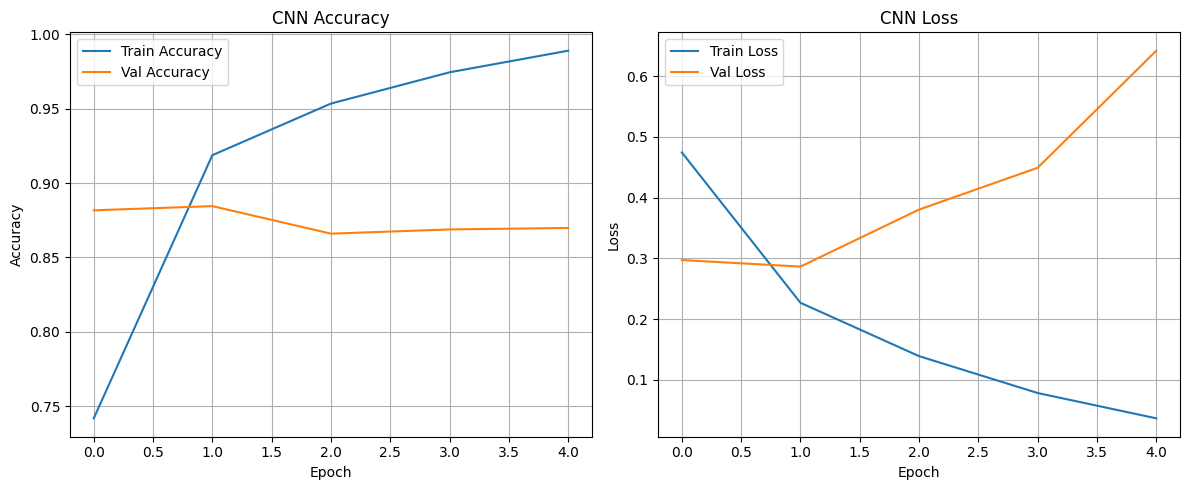

(<Sequential name=sequential_1, built=True>,
 <keras.src.callbacks.history.History at 0x7b988c6874d0>)

In [ ]:
# CNN Model
cnn_model = Sequential([
    Embedding(10000, 128, input_length=200),
    Conv1D(128, 5, activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])
train_model(cnn_model, "CNN", X_train, y_train, X_test, y_test)


### **LSTM Model**


Training LSTM Model...
----------------------------------------
Epoch 1/5
188/188 - 97s - 516ms/step - accuracy: 0.7947 - loss: 0.4518 - val_accuracy: 0.8428 - val_loss: 0.3620
Epoch 2/5
188/188 - 89s - 475ms/step - accuracy: 0.9003 - loss: 0.2688 - val_accuracy: 0.8632 - val_loss: 0.3176
Epoch 3/5
188/188 - 141s - 752ms/step - accuracy: 0.9190 - loss: 0.2165 - val_accuracy: 0.8757 - val_loss: 0.3336
Epoch 4/5
188/188 - 91s - 483ms/step - accuracy: 0.9350 - loss: 0.1809 - val_accuracy: 0.8632 - val_loss: 0.3540
Epoch 5/5
188/188 - 139s - 740ms/step - accuracy: 0.9459 - loss: 0.1531 - val_accuracy: 0.8650 - val_loss: 0.4166

LSTM Test Accuracy: 0.8676


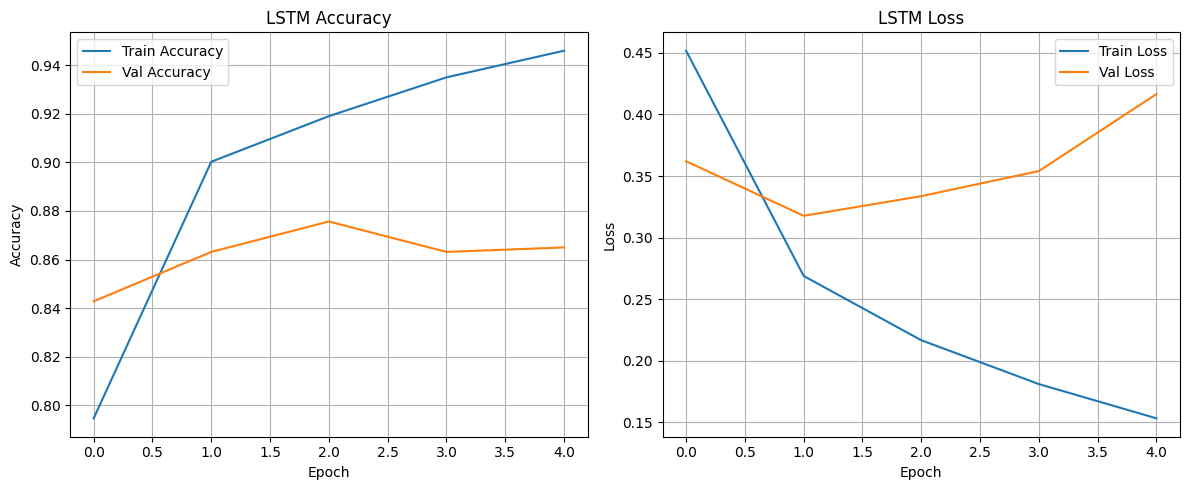

(<Sequential name=sequential_2, built=True>,
 <keras.src.callbacks.history.History at 0x7b98a2e09990>)

In [ ]:
# LSTM Model
lstm_model = Sequential([
    Embedding(10000, 128, input_length=200),
    LSTM(64, dropout=0.2, recurrent_dropout=0.2),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])
train_model(lstm_model, "LSTM", X_train, y_train, X_test, y_test)

# **Step 8: Fuzzy Logic on predictions**


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


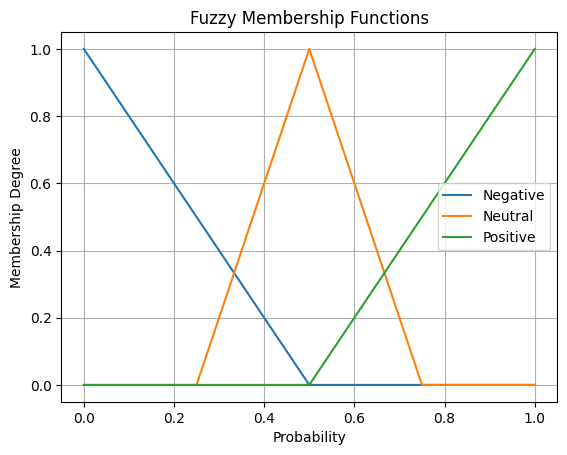


Review 1 Raw Prediction: 0.0029
Negative: 0.99
Neutral : 0.00
Positive: 0.00

Review 2 Raw Prediction: 0.9548
Negative: 0.00
Neutral : 0.00
Positive: 0.91

Review 3 Raw Prediction: 0.0184
Negative: 0.96
Neutral : 0.00
Positive: 0.00

Review 4 Raw Prediction: 0.9988
Negative: 0.00
Neutral : 0.00
Positive: 1.00

Review 5 Raw Prediction: 0.1016
Negative: 0.80
Neutral : 0.00
Positive: 0.00


In [ ]:
# Step 11: Fuzzy Logic on predictions
sample_probs = lstm_model.predict(X_test[:5]).flatten()
x_fuzzy = np.arange(0, 1.01, 0.01)
neg = fuzz.trimf(x_fuzzy, [0, 0, 0.5])
neu = fuzz.trimf(x_fuzzy, [0.25, 0.5, 0.75])
pos = fuzz.trimf(x_fuzzy, [0.5, 1, 1])

plt.plot(x_fuzzy, neg, label='Negative')
plt.plot(x_fuzzy, neu, label='Neutral')
plt.plot(x_fuzzy, pos, label='Positive')
plt.title("Fuzzy Membership Functions")
plt.xlabel("Probability")
plt.ylabel("Membership Degree")
plt.legend()
plt.grid(True)
plt.show()

for i, prob in enumerate(sample_probs):
    print(f"\nReview {i+1} Raw Prediction: {prob:.4f}")
    print(f"Negative: {fuzz.interp_membership(x_fuzzy, neg, prob):.2f}")
    print(f"Neutral : {fuzz.interp_membership(x_fuzzy, neu, prob):.2f}")
    print(f"Positive: {fuzz.interp_membership(x_fuzzy, pos, prob):.2f}")